# Plot the hypergraph with netwulf

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import networkx as nx
import pickle as pkl
import operator
import re
import copy
import scipy 
%matplotlib inline
import netwulf as wulf


from hypergraph import *

ModuleNotFoundError: No module named 'hypergraph'

In [2]:
# load the data
filehandler = open("./../../data/proteinInteraction/hypergraphProteins.out", 'rb') 
proteinHypergraph = pkl.load(filehandler)
filehandler.close()


In [3]:
# construct a representing graph
G = line_graph(proteinHypergraph, as_hyper=False)
dyadicProjectionHypergraph= nx.Graph(G)

In [4]:
# get the components
connectedComponents = nx.connected_component_subgraphs(dyadicProjectionHypergraph)


AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

In [ ]:
comp_dict = {idx: comp.nodes() for idx, comp in enumerate(connectedComponents)}
attr = {n: comp_id for comp_id, nodes in comp_dict.items() for n in nodes}
nx.set_node_attributes(dyadicProjectionHypergraph, attr,"group")


In [5]:
# get the hypergraph degree for every node and use it as colour
hypergraphDegree = proteinHypergraph.D


hypergraphDegreeColor =[]


valueToPlot = np.log10(hypergraphDegree)
valueToPlotRescaled = 255*(valueToPlot - np.min(valueToPlot))/np.max(valueToPlot)

for deg in valueToPlotRescaled:
    #color = '#%02x%02x%02x' % (int(np.log10(deg)), 0, 0)
    color = '#%02x%02x%02x' % (int(deg), 0, 50)
    hypergraphDegreeColor.append(color)


dictionaryColor = dict(zip(list(dyadicProjectionHypergraph.nodes), hypergraphDegreeColor))
nx.set_node_attributes(dyadicProjectionHypergraph, dictionaryColor,"group")


In [15]:
network, config = wulf.visualize(dyadicProjectionHypergraph, plot_in_cell_below=False)


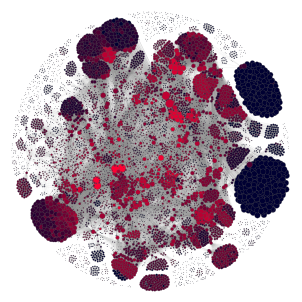

In [16]:
fig, ax = wulf.draw_netwulf(network)
plt.savefig("proteinHypergraphPlotNetwulf.pdf")